<a href="https://colab.research.google.com/github/mbabar1100/AIDrivenCovidTrendsPakistan/blob/main/AIDrivenCovidTrendsPakistan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI-Driven Analysis and Visualization of COVID-19 Trends: Insights from Pakistan's Data

This project leverages artificial intelligence and advanced data visualization techniques to analyze and interpret COVID-19 data, specifically focusing on Pakistan's reported cases, deaths, and tests. By utilizing machine learning algorithms and data processing techniques, the project extracts meaningful insights from the raw data, such as identifying trends in COVID-19 deaths across different years and months. AI-driven analysis helps in detecting patterns related to the peak of the pandemic, providing predictions on critical factors like test rates and death tolls. Through intuitive data visualizations, such as pie charts and count plots, the project effectively communicates key metrics, allowing stakeholders to better understand the dynamics of the pandemic and make informed decisions. This combination of AI and visualization transforms complex data into actionable insights, making it easier to spot trends and anomalies in the ongoing battle against the COVID-19 crisis.

Step 1: Load Libraries


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import files


Step 2: Upload Data File


In [ ]:
# Upload your file
uploaded = files.upload()

# Assuming the uploaded file is in the current directory (use the filename of the uploaded file)
file_name = next(iter(uploaded))  # Get the first file name uploaded


Saving Pakistan-Covid-19_DataSet.xlsx to Pakistan-Covid-19_DataSet.xlsx


Step 3: Load Data into DataFrame


In [ ]:
# Read the Excel file into a DataFrame
df = pd.read_excel(file_name)

# Preview the first few rows of the data
df.head()
df.info()
df.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             653 non-null    object
 1   confirmed_cases  653 non-null    int64 
 2   deaths           653 non-null    int64 
 3   tests_performed  653 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 20.5+ KB


,date,confirmed_cases,deaths,tests_performed
513,2021-08-27,4191,120,61306
498,2021-08-12,4619,79,59504
374,2021-04-10,5050,114,46066
608,2021-11-30,414,9,42381
563,2021-10-16,720,17,44831


Step 4: Process Date Column


In [ ]:
# Extract year and month from the 'date' column
df['year'] = pd.DatetimeIndex(df["date"]).year
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.strftime("%b")  # Convert month to abbreviated form
df.drop('date', inplace=True, axis=1)  # Drop the original date column


Step 5: Summary Statistics


In [ ]:
# Print some summary statistics about the data
print("*--------------------------------------*")
print(f"Data present for {len(list(df['year'].unique()))} years.")
print("*--------------------------------------*")
df.nunique()
print("*--------------------------------------*")
print(f"Total deaths reported {df['deaths'].sum()}.")
print("*--------------------------------------*")
print("*--------------------------------------*")
print(f"Total tests performed {df['tests_performed'].sum()}.")
print("*--------------------------------------*")
print("*--------------------------------------*")
print(f"Total cases confirmed {df['confirmed_cases'].sum()}.")
print("*--------------------------------------*")


*--------------------------------------*
Data present for 3 years.
*--------------------------------------*
*--------------------------------------*
Total deaths reported 28714.
*--------------------------------------*
*--------------------------------------*
Total tests performed 23944455.
*--------------------------------------*
*--------------------------------------*
Total cases confirmed 1313633.
*--------------------------------------*


Step 6: Find Year with Most Deaths



In [ ]:
# Find the year with the most deaths
most_death_year = df.groupby('year', as_index=False)['deaths'].sum().sort_values(by='deaths', ascending=False)
print("*--------------------------------------*")
print(f"Most deaths of {most_death_year['deaths'].iloc[0]} is in the year of {most_death_year['year'].iloc[0]}.")
print("*--------------------------------------*")


*--------------------------------------*
Most deaths of 18766 is in the year of 2021.
*--------------------------------------*


Step 7: Visualize Data Recorded by Year



<ipython-input-7-22fbe0ba22c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='year', data=df, palette="rocket_r")


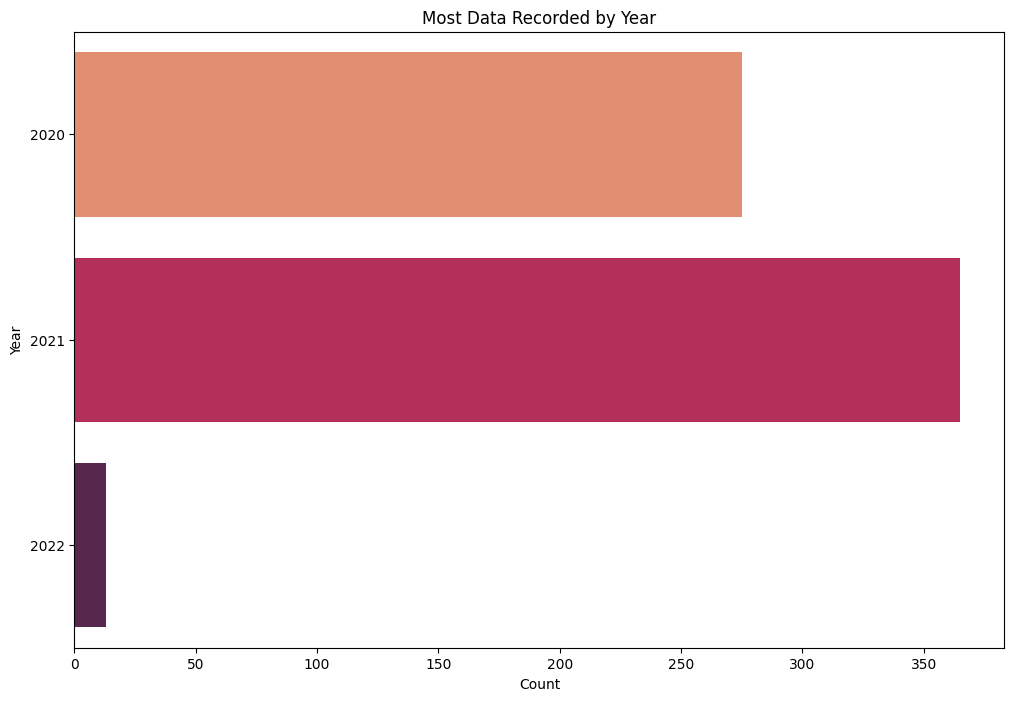

In [ ]:
# Plot count of data by year
plt.figure(figsize=(12, 8))
sns.countplot(y='year', data=df, palette="rocket_r")
plt.title("Most Data Recorded by Year")
plt.ylabel("Year")
plt.xlabel("Count")
plt.show()


Step 8: Visualize Data Recorded by Month for Each Year


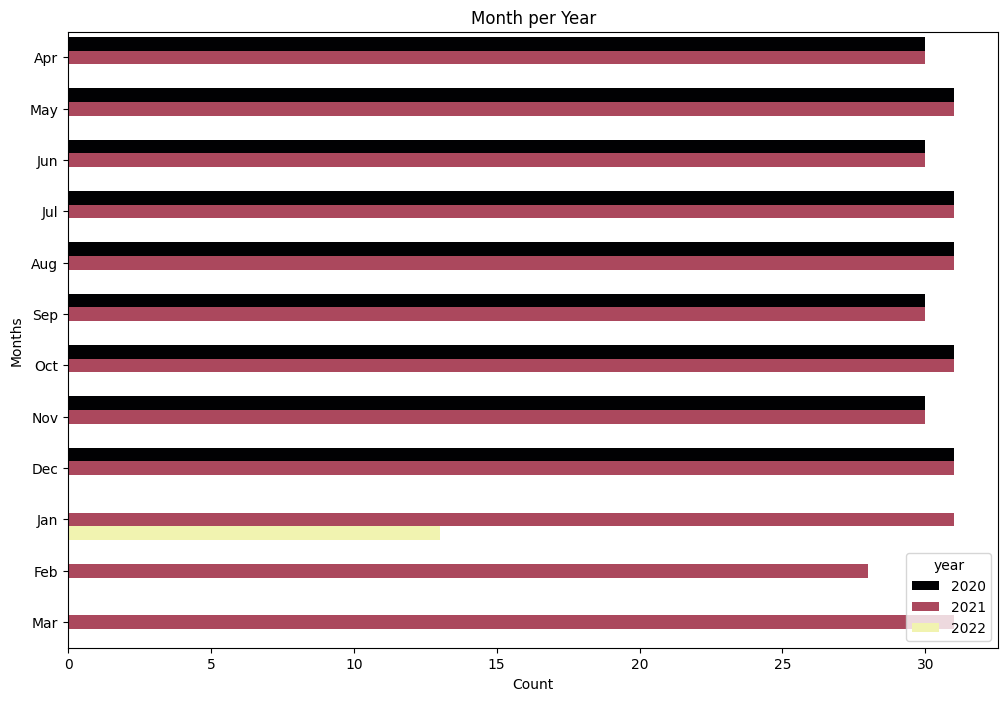

In [ ]:
# Plot count of data by month for each year
plt.figure(figsize=(12, 8))
sns.countplot(y='month', data=df, hue="year", palette="inferno")
plt.title("Month per Year")
plt.ylabel("Months")
plt.xlabel("Count")
plt.show()


Step 9: Find Month with Most Deaths in Each Year



In [ ]:
# Find most deaths by month for each year
most_deaths_by_month = df.groupby(['month', 'year'], as_index=False)['deaths'].sum().sort_values(by="deaths", ascending=False)

# Display results for each year
print("Most deaths in 2020:", most_deaths_by_month['month'][most_deaths_by_month['year'] == 2020].max())
print("Most deaths in 2021:", most_deaths_by_month['month'][most_deaths_by_month['year'] == 2021].max())
print("Most deaths in 2022:", most_deaths_by_month['month'][most_deaths_by_month['year'] == 2022].max())


Most deaths in 2020: Sep
Most deaths in 2021: Sep
Most deaths in 2022: Jan


Step 10: Pie Chart of Records per Year



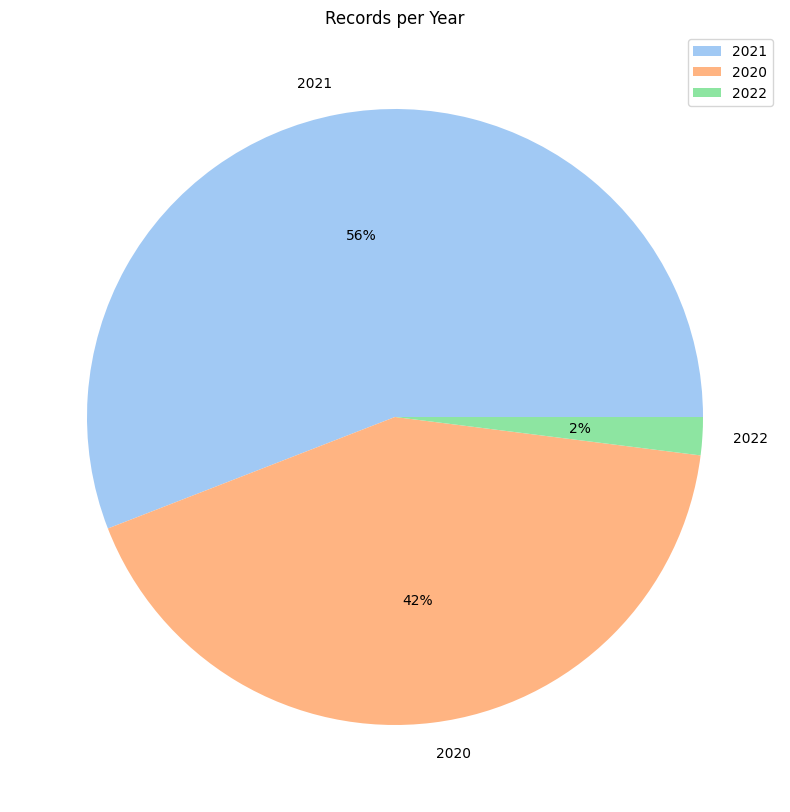

In [ ]:
# Pie chart of records per year
label = df['year'].value_counts().index
values = df['year'].value_counts().values
colors = sns.color_palette("pastel")[0:5]
plt.figure(figsize=(10, 10))
plt.pie(values, labels=label, colors=colors, autopct="%.0f%%")
plt.title("Records per Year")
plt.legend()
plt.show()


Step 11: Pie Chart of Deaths per Year


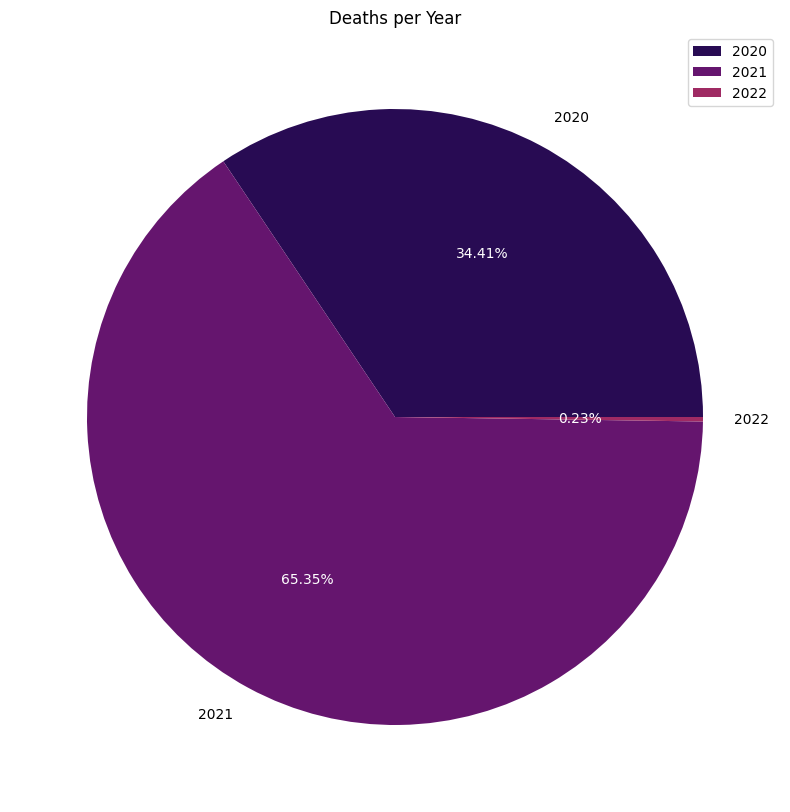

In [ ]:
# Pie chart of deaths per year
value_deaths = df.groupby('year')['deaths'].sum().values
label_deaths = df.groupby('year')['deaths'].sum().index

colors = sns.color_palette("inferno")[0:5]
plt.figure(figsize=(10, 10))
_, _, autotexts = plt.pie(value_deaths, labels=label_deaths, colors=colors, autopct="%.2f%%")
for ins in autotexts:
    ins.set_color("white")
plt.title("Deaths per Year")
plt.legend()
plt.show()
